In [8]:
# loop through subjs to convert mgz to nifti
# from pathlib import Path
# from typing import List, Dict
# from collections import defaultdict
# import os
# import nibabel as nib

# def find_subjects(base_path: Path, prefix: str = "OAS2_") -> List[Path]:
#     return sorted([
#         p for p in base_path.iterdir() if p.is_dir() and p.name.startswith(prefix)
#     ])


# def group_visits_by_subject(subject_dirs: List[Path]) -> Dict[str, List[Path]]:
#     grouped = defaultdict(list)
#     for path in subject_dirs:
#         parts = path.name.split('_')
#         if len(parts) >= 3:
#             subject_id = parts[1]
#             grouped[subject_id].append(path)
#     return grouped


# def get_qualified_subjects(subject_groups: Dict[str, List[Path]]) -> List[str]:
#     qualified = []
#     for subject_id, visits in subject_groups.items():
#         scan_types = {v.name.split('_')[-1] for v in visits}
#         if len(scan_types) >= 3 and {"MR1", "MR3"}.issubset(scan_types):
#             qualified.append(subject_id)
#     return sorted(qualified)


# def convert_mgz_to_nifti(mgz_path: Path, nii_path: Path):
#     if mgz_path.exists():
#         print(f"Converting {mgz_path} to NIfTI...")
#         data = nib.load(str(mgz_path))
#         img_nifti = nib.Nifti1Image(data.get_fdata(), data.affine, header=nib.Nifti1Header())
#         nib.save(img_nifti, str(nii_path))
#     else:
#         print(f"File not found: {mgz_path}")


# def process_subject_range_for_conversion(
#     base_dir: str,
#     data_dir: str,
#     start: int,
#     end: int
# ):
#     data_dir = Path(data_dir)
#     base_dir = Path(base_dir)

#     subject_visit_dirs = find_subjects(data_dir)
#     subject_groups = group_visits_by_subject(subject_visit_dirs)
#     qualified_subjects = get_qualified_subjects(subject_groups)

#     # Print full list of qualified subjects
#     print("\n=== Qualified Subjects (with MR1 and MR3, at least 3 scans total) ===")
#     for idx, sid in enumerate(qualified_subjects):
#         print(f"[{idx}] OAS2_{sid}")
#     print("=====================================================================")

#     end = min(end, len(qualified_subjects))
#     assigned_subjects = qualified_subjects[start:end]

#     for subject_id in assigned_subjects:
#         visits = subject_groups[subject_id]
#         for visit in visits:
#             if visit.name.endswith("MR1") or visit.name.endswith("MR3"):
#                 subj_dir = base_dir / visit.name
#                 mgz_path = subj_dir / 'mri' / 'aparc.DKTatlas+aseg.deep.mgz'
#                 nii_path = subj_dir / 'mri' / 'aparc.DKTatlas+aseg.deep.nii.gz'

#                 convert_mgz_to_nifti(mgz_path, nii_path)

In [9]:
# covnert mgz to nifti
# process_subject_range_for_conversion(
#     base_dir="/home/jovyan/fastsurfer_outputs",
#     data_dir="/home/jovyan/shared/data/OASIS-2/OAS2_RAW_PART1",
#     start=23,
#     end=26
# )


=== Qualified Subjects (with MR1 and MR3, at least 3 scans total) ===
[0] OAS2_0002
[1] OAS2_0005
[2] OAS2_0007
[3] OAS2_0012
[4] OAS2_0013
[5] OAS2_0017
[6] OAS2_0018
[7] OAS2_0020
[8] OAS2_0027
[9] OAS2_0031
[10] OAS2_0034
[11] OAS2_0036
[12] OAS2_0037
[13] OAS2_0040
[14] OAS2_0041
[15] OAS2_0044
[16] OAS2_0048
[17] OAS2_0049
[18] OAS2_0051
[19] OAS2_0057
[20] OAS2_0058
[21] OAS2_0061
[22] OAS2_0062
[23] OAS2_0064
[24] OAS2_0067
[25] OAS2_0070
[26] OAS2_0073
[27] OAS2_0076
[28] OAS2_0078
[29] OAS2_0079
[30] OAS2_0080
[31] OAS2_0090
[32] OAS2_0095
Converting /home/jovyan/fastsurfer_outputs/OAS2_0064_MR1/mri/aparc.DKTatlas+aseg.deep.mgz to NIfTI...
Converting /home/jovyan/fastsurfer_outputs/OAS2_0064_MR3/mri/aparc.DKTatlas+aseg.deep.mgz to NIfTI...
Converting /home/jovyan/fastsurfer_outputs/OAS2_0067_MR1/mri/aparc.DKTatlas+aseg.deep.mgz to NIfTI...
Converting /home/jovyan/fastsurfer_outputs/OAS2_0067_MR3/mri/aparc.DKTatlas+aseg.deep.mgz to NIfTI...
Converting /home/jovyan/fastsurfer_o

/srv/conda/envs/notebook/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



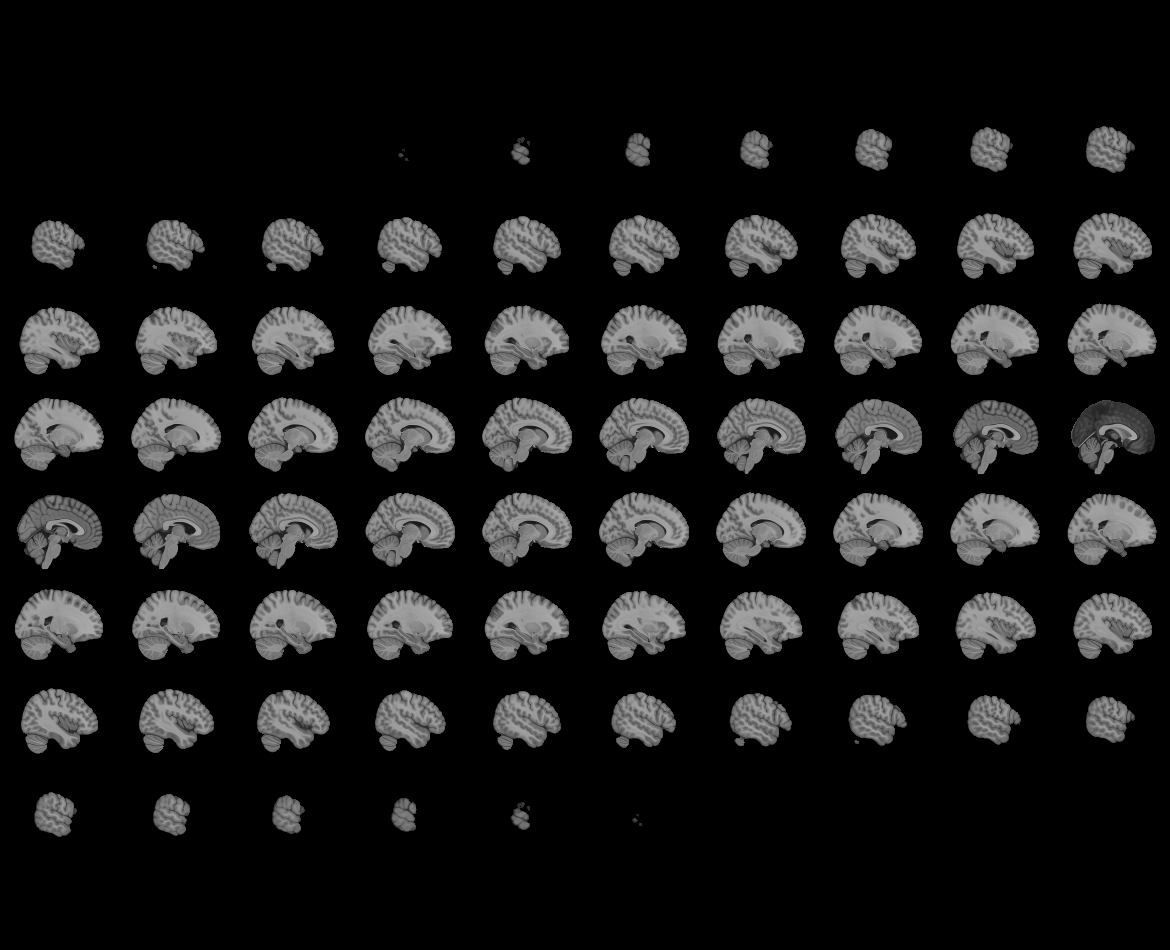
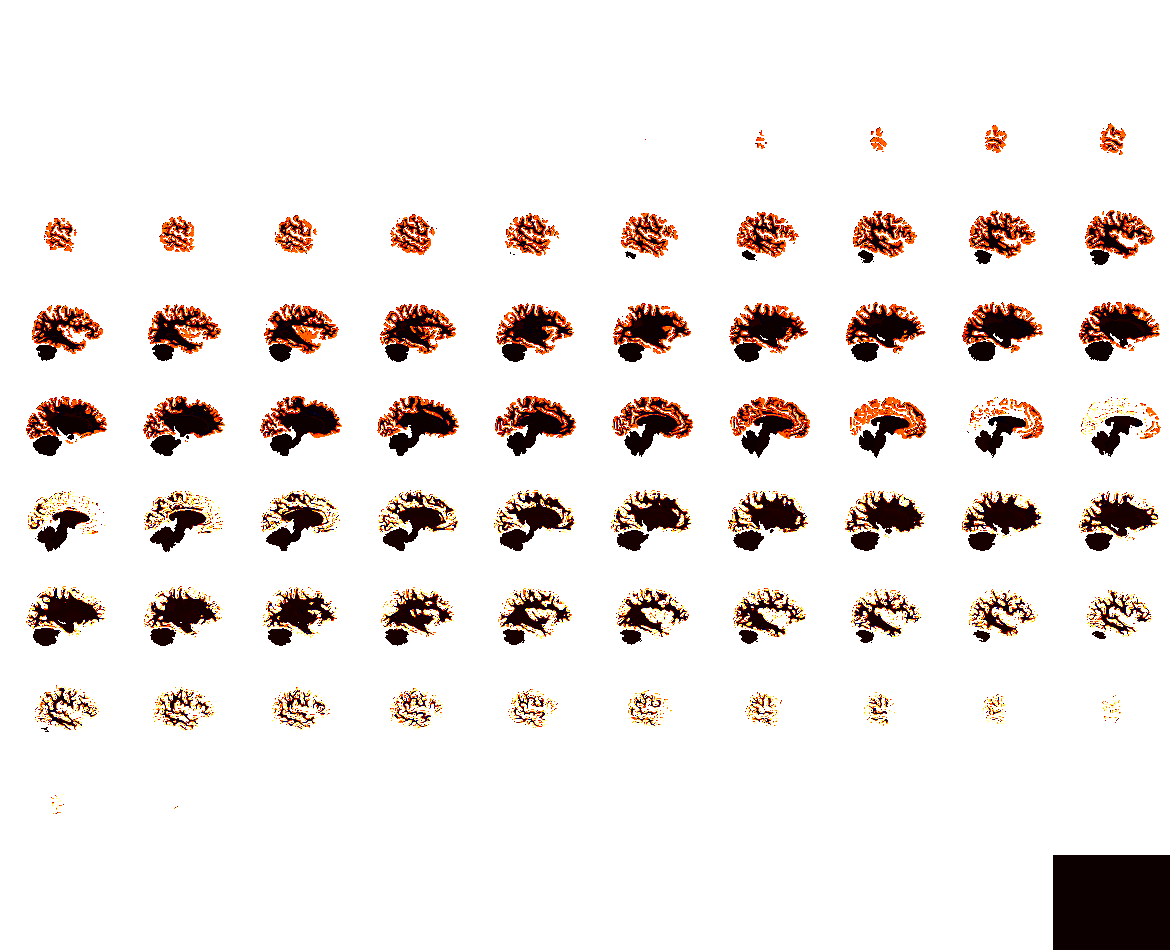

In [7]:
# # plot interactive images using nifti file
# from nilearn import plotting

# view = plotting.view_img(
#     "/home/jovyan/fastsurfer_outputs/OAS2_0064_MR1/mri/aparc.DKTatlas+aseg.deep.nii.gz",
#     title="Interactive Brain View"
# )
# view 


### example of reading mgz file for single subj

In [17]:
import nibabel as nib
import numpy as np

# load mgz file
img = nib.load("/home/jovyan/fastsurfer_outputs/OAS2_0064_MR1/mri/aparc.DKTatlas+aseg.deep.mgz")
data = img.get_fdata()
labels = np.unique(data).astype(int)
# get unique brain regions
print("Unique region labels found in the file:")
print(labels)

Unique region labels found in the file:
[   0    2    4    5    7    8   10   11   12   13   14   15   16   17
   18   24   26   28   31   41   43   44   46   47   49   50   51   52
   53   54   58   60   63   77 1002 1003 1005 1006 1007 1008 1009 1010
 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024
 1025 1026 1027 1028 1029 1030 1031 1034 1035 2002 2003 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2034 2035]


In [18]:
# interactive plot to explore data
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

shape = data.shape

print(f"Volume shape: {shape}")
print("Use the sliders below to explore slices.")

# === Interactive viewer ===
def show_slice(axis='z', index=0, cmap='tab20'):
    plt.figure(figsize=(6,6))
    if axis == 'x':
        slice_data = data[index, :, :]
    elif axis == 'y':
        slice_data = data[:, index, :]
    elif axis == 'z':
        slice_data = data[:, :, index]
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'")
    
    plt.imshow(slice_data.T, origin='lower', cmap=cmap)
    plt.title(f"{axis.upper()}-axis slice {index}")
    plt.axis('off')
    plt.show()

# === Widgets ===
axis_widget = widgets.Dropdown(options=['x', 'y', 'z'], value='z', description='Axis:')
index_slider = widgets.IntSlider(value=128, min=0, max=255, step=1, description='Slice:')
cmap_widget = widgets.Dropdown(options=['tab20', 'nipy_spectral', 'viridis', 'gray'], value='tab20', description='Colormap:')

# === Update max slider value based on axis ===
def update_slider_range(*args):
    axis = axis_widget.value
    index_slider.max = shape['xyz'.index(axis)] - 1
    index_slider.value = index_slider.max // 2

axis_widget.observe(update_slider_range, names='value')

# === Interactive output ===
ui = widgets.VBox([axis_widget, index_slider, cmap_widget])
out = widgets.interactive_output(show_slice, {'axis': axis_widget, 'index': index_slider, 'cmap': cmap_widget})

display(ui, out)

Volume shape: (256, 256, 256)
Use the sliders below to explore slices.


Output()

In [19]:
# Map label values to region names
lut_path = "/home/jovyan/high-dimensionality-prediction/FreeSurferColorLUT.txt"

# Load and parse LUT
label_map = {}
with open(lut_path) as f:
    for line in f:
        if line.strip() and not line.startswith('#'):
            parts = line.split()
            if parts[0].isdigit():
                label_map[int(parts[0])] = parts[1]

# Print the label mapping
print("\nLabel to region name:")
for label in labels:
    name = label_map.get(label, "Unknown")
    print(f"{label}: {name}")


Label to region name:
0: Unknown
2: Left-Cerebral-White-Matter
4: Left-Lateral-Ventricle
5: Left-Inf-Lat-Vent
7: Left-Cerebellum-White-Matter
8: Left-Cerebellum-Cortex
10: Left-Thalamus
11: Left-Caudate
12: Left-Putamen
13: Left-Pallidum
14: 3rd-Ventricle
15: 4th-Ventricle
16: Brain-Stem
17: Left-Hippocampus
18: Left-Amygdala
24: CSF
26: Left-Accumbens-area
28: Left-VentralDC
31: Left-choroid-plexus
41: Right-Cerebral-White-Matter
43: Right-Lateral-Ventricle
44: Right-Inf-Lat-Vent
46: Right-Cerebellum-White-Matter
47: Right-Cerebellum-Cortex
49: Right-Thalamus
50: Right-Caudate
51: Right-Putamen
52: Right-Pallidum
53: Right-Hippocampus
54: Right-Amygdala
58: Right-Accumbens-area
60: Right-VentralDC
63: Right-choroid-plexus
77: WM-hypointensities
1002: ctx-lh-caudalanteriorcingulate
1003: ctx-lh-caudalmiddlefrontal
1005: ctx-lh-cuneus
1006: ctx-lh-entorhinal
1007: ctx-lh-fusiform
1008: ctx-lh-inferiorparietal
1009: ctx-lh-inferiortemporal
1010: ctx-lh-isthmuscingulate
1011: ctx-lh-late

In [20]:
# Count number of voxels per region
from collections import Counter

counts = Counter(data.flatten().astype(int))

print("\nVoxel counts per region:")
for label, count in sorted(counts.items()):
    name = label_map.get(label, "Unknown")
    print(f"{label:3d} ({name:30}): {count:8d} voxels")


Voxel counts per region:
  0 (Unknown                       ): 15779204 voxels
  2 (Left-Cerebral-White-Matter    ):   174479 voxels
  4 (Left-Lateral-Ventricle        ):    17992 voxels
  5 (Left-Inf-Lat-Vent             ):     1158 voxels
  7 (Left-Cerebellum-White-Matter  ):     9354 voxels
  8 (Left-Cerebellum-Cortex        ):    43675 voxels
 10 (Left-Thalamus                 ):     5485 voxels
 11 (Left-Caudate                  ):     4068 voxels
 12 (Left-Putamen                  ):     4772 voxels
 13 (Left-Pallidum                 ):     1617 voxels
 14 (3rd-Ventricle                 ):     2207 voxels
 15 (4th-Ventricle                 ):     2465 voxels
 16 (Brain-Stem                    ):    17834 voxels
 17 (Left-Hippocampus              ):     3078 voxels
 18 (Left-Amygdala                 ):      928 voxels
 24 (CSF                           ):     1699 voxels
 26 (Left-Accumbens-area           ):      570 voxels
 28 (Left-VentralDC                ):     3210 voxels
 3

### example of looping through all subjs 

In [21]:
# loop through all subjs to get anatomical regions and number of voxels
# print out the shared regions by all subjs
# compare the regions from all subjs
from pathlib import Path
from typing import List, Dict
from collections import defaultdict, Counter
import nibabel as nib
import numpy as np

def find_subjects(base_path: Path, prefix: str = "OAS2_") -> List[Path]:
    return sorted([
        p for p in base_path.iterdir() if p.is_dir() and p.name.startswith(prefix)
    ])

def group_visits_by_subject(subject_dirs: List[Path]) -> Dict[str, List[Path]]:
    grouped = defaultdict(list)
    for path in subject_dirs:
        parts = path.name.split('_')
        if len(parts) >= 3:
            subject_id = parts[1]
            grouped[subject_id].append(path)
    return grouped

def get_qualified_subjects(subject_groups: Dict[str, List[Path]]) -> List[str]:
    qualified = []
    for subject_id, visits in subject_groups.items():
        scan_types = {v.name.split('_')[-1] for v in visits}
        if len(scan_types) >= 3 and {"MR1", "MR3"}.issubset(scan_types):
            qualified.append(subject_id)
    return sorted(qualified)

def load_freesurfer_lut(lut_path: Path) -> Dict[int, str]:
    label_map = {}
    with open(lut_path) as f:
        for line in f:
            if line.strip() and not line.startswith("#"):
                parts = line.strip().split()
                if parts[0].isdigit():
                    label_map[int(parts[0])] = parts[1]
    return label_map

def process_subject_segmentations(
    output_dir: str,
    data_dir: str,
    lut_path: str,
    start: int,
    end: int
):
    data_dir = Path(data_dir)
    output_dir = Path(output_dir)
    lut_path = Path(lut_path)

    subject_visit_dirs = find_subjects(data_dir)
    subject_groups = group_visits_by_subject(subject_visit_dirs)
    qualified_subjects = get_qualified_subjects(subject_groups)

    end = min(end, len(qualified_subjects))
    assigned_subjects = qualified_subjects[start:end]
    print(f"\n=== Processing subjects {start} to {end - 1} ===")

    label_map = load_freesurfer_lut(lut_path)
    shared_labels = None  # Set of shared labels
    label_counts_per_subject = {}  # subj_id → number of labels

    for subject_id in assigned_subjects:
        print(f"\n--- Subject: OAS2_{subject_id} ---")
        visits = subject_groups[subject_id]

        subject_labels = set()

        for visit in visits:
            if visit.name.endswith("MR1") or visit.name.endswith("MR3"):
                seg_path = output_dir / visit.name / "mri" / "aparc.DKTatlas+aseg.deep.mgz"
                if not seg_path.exists():
                    print(f"Missing segmentation for {visit.name}")
                    continue

                seg = nib.load(str(seg_path))
                data = seg.get_fdata()
                voxel_sizes = seg.header.get_zooms()
                voxel_volume_mm3 = np.prod(voxel_sizes)
                counts = Counter(data.flatten().astype(int))

                visit_labels = set(counts.keys()) - {0}
                subject_labels |= visit_labels  # Union all visits for subject

                print(f"\nScan: {visit.name}")
                print(f"{'Label':<5} {'Region':<30} {'Voxels':>10} {'Volume (mm³)':>15}")
                print("-" * 65)
                for label in sorted(visit_labels):
                    count = counts[label]
                    region = label_map.get(label, "Unknown")
                    volume = count * voxel_volume_mm3
                    print(f"{label:<5} {region:<30} {count:10d} {volume:15.2f}")

        label_counts_per_subject[subject_id] = len(subject_labels)
        print(f"\nSubject OAS2_{subject_id} has {len(subject_labels)} unique labels.")

        if shared_labels is None:
            shared_labels = subject_labels
        else:
            shared_labels &= subject_labels
    
    # === Summary: Subject-level ===
    print("\n=== Summary (per subject) ===")
    for subject_id in assigned_subjects:
        print(f"Subject OAS2_{subject_id}: {label_counts_per_subject[subject_id]} labels")

    print(f"\nShared labels across all {len(assigned_subjects)} subjects: {len(shared_labels)}")
    print(f"{'Label':<5} {'Region':<30}")
    print("-" * 40)
    for label in sorted(shared_labels):
        name = label_map.get(label, "Unknown")
        print(f"{label:<5} {name:<30}")

    # === NEW: Compare if all scans (not just subjects) have the same labels ===
    print("\n=== Scan-level Label Set Comparison ===")
    scan_label_sets = {}  # visit.name → label set

    for subject_id in assigned_subjects:
        visits = subject_groups[subject_id]
        for visit in visits:
            if visit.name.endswith("MR1") or visit.name.endswith("MR3"):
                seg_path = output_dir / visit.name / "mri" / "aparc.DKTatlas+aseg.deep.mgz"
                if not seg_path.exists():
                    continue
                seg = nib.load(str(seg_path))
                data = seg.get_fdata()
                labels = set(np.unique(data).astype(int)) - {0}
                scan_label_sets[visit.name] = labels

    # Use the first scan as the reference
    all_scans = list(scan_label_sets.keys())
    ref_scan = all_scans[0]
    ref_labels = scan_label_sets[ref_scan]
    all_match = True

    for scan in all_scans[1:]:
        current_labels = scan_label_sets[scan]
        if current_labels != ref_labels:
            all_match = False
            missing = ref_labels - current_labels
            extra = current_labels - ref_labels
            print(f"\n {scan} differs from {ref_scan}:")
            if missing:
                print("  Missing labels:")
                for l in sorted(missing):
                    print(f"    {l:3d} - {label_map.get(l, 'Unknown')}")
            if extra:
                print("  Extra labels:")
                for l in sorted(extra):
                    print(f"    {l:3d} - {label_map.get(l, 'Unknown')}")

    if all_match:
        print("\n All scans have exactly the same set of labels.")


In [22]:
process_subject_segmentations(
    output_dir="/home/jovyan/fastsurfer_outputs",
    data_dir="/home/jovyan/shared/data/OASIS-2/OAS2_RAW_PART1",
    lut_path="/home/jovyan/high-dimensionality-prediction/FreeSurferColorLUT.txt",
    start=23,
    end=26
)


=== Processing subjects 23 to 25 ===

--- Subject: OAS2_0064 ---

Scan: OAS2_0064_MR1
Label Region                             Voxels    Volume (mm³)
-----------------------------------------------------------------
2     Left-Cerebral-White-Matter         174479       174479.00
4     Left-Lateral-Ventricle              17992        17992.00
5     Left-Inf-Lat-Vent                    1158         1158.00
7     Left-Cerebellum-White-Matter         9354         9354.00
8     Left-Cerebellum-Cortex              43675        43675.00
10    Left-Thalamus                        5485         5485.00
11    Left-Caudate                         4068         4068.00
12    Left-Putamen                         4772         4772.00
13    Left-Pallidum                        1617         1617.00
14    3rd-Ventricle                        2207         2207.00
15    4th-Ventricle                        2465         2465.00
16    Brain-Stem                          17834        17834.00
17    Left-Hipp